In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import numpy as np
import keras_tuner as kt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train=x_train/255
x_test=x_test/255

In [20]:
# define the model and add layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=16, activation='tanh', kernel_initializer = keras.initializers.GlorotNormal))
model.add(tf.keras.layers.Dense(units=10, activation='softmax', kernel_initializer = keras.initializers.GlorotNormal))

# compile and fit the model to the training data
start =time.time()
model.compile( loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
history =model.fit(x_train,y_train, epochs=16, validation_split=0.2)
end=time.time()    

Epoch 1/16
  12/1500 [..............................] - ETA: 6s - loss: 1.9880 - accuracy: 0.3125  

2022-04-28 13:37:50.591830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.6261 - accuracy: 0.7986

2022-04-28 13:37:57.528705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 8s 5ms/step - loss: 0.6261 - accuracy: 0.7986 - val_loss: 0.4758 - val_accuracy: 0.8315
Epoch 2/16
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4326 - accuracy: 0.8485 - val_loss: 0.4169 - val_accuracy: 0.8534
Epoch 3/16
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4003 - accuracy: 0.8582 - val_loss: 0.4401 - val_accuracy: 0.8443
Epoch 4/16
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3833 - accuracy: 0.8647 - val_loss: 0.3955 - val_accuracy: 0.8587
Epoch 5/16
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3711 - accuracy: 0.8693 - val_loss: 0.3883 - val_accuracy: 0.8622
Epoch 6/16
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3624 - accuracy: 0.8714 - val_loss: 0.4031 - val_accuracy: 0.8553
Epoch 7/16
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3553 - accuracy: 0.8741 - val_loss: 0.4063 - val_accuracy: 0.8532
Epo

In [21]:
print(end-start)
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)
print('\nTest accuracy:', test_acc)

113.6455729007721
 42/313 [===>..........................] - ETA: 1s - loss: 0.3817 - accuracy: 0.8713

2022-04-28 13:39:43.719379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3968 - accuracy: 0.8605

Test accuracy: 0.8605000376701355


In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


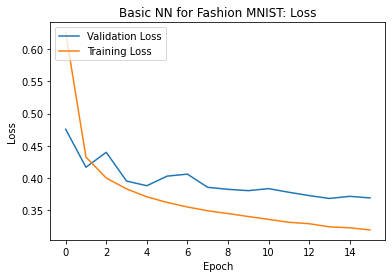

In [24]:
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss'])
plt.title('Basic NN for Fashion MNIST: Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', "Training Loss"], loc='upper left')
plt.show()